In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('train_ver_1.csv')
test_data = pd.read_csv('test_ver_1.csv')

## Prediction Score Function

In [4]:
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: \n",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

## Dataset

In [5]:
# Train set
X_train = train_data.drop('Exited', axis=1)
y_train = train_data['Exited']

# Test set
X_test = test_data.drop('Exited', axis=1)
y_test = test_data['Exited']


In [6]:
X_train.columns

Index(['Unnamed: 0', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Complain', 'Satisfaction Score', 'Point Earned', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER', 'Risk Score', 'Loyalty Score'],
      dtype='object')

In [7]:
X_train = X_train.drop('Unnamed: 0', axis=1)
X_test = X_test.drop('Unnamed: 0', axis=1)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10896 entries, 0 to 10895
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10896 non-null  float64
 1   Age                 10896 non-null  float64
 2   Tenure              10896 non-null  float64
 3   Balance             10896 non-null  float64
 4   NumOfProducts       10896 non-null  float64
 5   HasCrCard           10896 non-null  float64
 6   IsActiveMember      10896 non-null  float64
 7   EstimatedSalary     10896 non-null  float64
 8   Complain            10896 non-null  float64
 9   Satisfaction Score  10896 non-null  float64
 10  Point Earned        10896 non-null  float64
 11  Geography_France    10896 non-null  int64  
 12  Geography_Germany   10896 non-null  int64  
 13  Geography_Spain     10896 non-null  int64  
 14  Gender_Female       10896 non-null  int64  
 15  Gender_Male         10896 non-null  int64  
 16  Card

In [9]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         3000 non-null   float64
 1   Age                 3000 non-null   float64
 2   Tenure              3000 non-null   float64
 3   Balance             3000 non-null   float64
 4   NumOfProducts       3000 non-null   float64
 5   HasCrCard           3000 non-null   float64
 6   IsActiveMember      3000 non-null   float64
 7   EstimatedSalary     3000 non-null   float64
 8   Complain            3000 non-null   float64
 9   Satisfaction Score  3000 non-null   float64
 10  Point Earned        3000 non-null   float64
 11  Geography_France    3000 non-null   int64  
 12  Geography_Germany   3000 non-null   int64  
 13  Geography_Spain     3000 non-null   int64  
 14  Gender_Female       3000 non-null   int64  
 15  Gender_Male         3000 non-null   int64  
 16  Card T

## Hierarchy Clustering

In [11]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score


In [12]:
selected_feature = ['HasCrCard', 'Satisfaction Score', 'Risk Score', 'Loyalty Score', 'Complain']

In [13]:
X = X_train[selected_feature]
y = X_train.index

### Hierarchy: Single

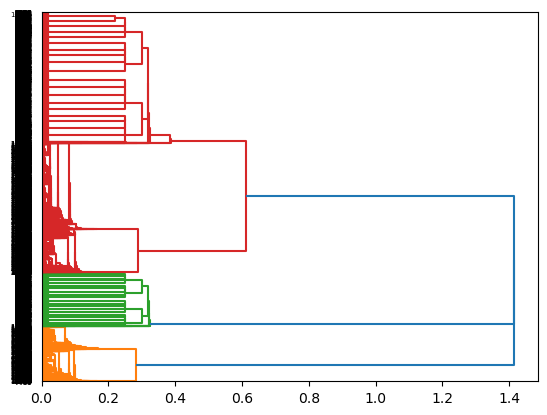

In [25]:
Z = hierarchy.linkage(X.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z, orientation='right')

In [23]:
(dn.keys())

dict_keys(['icoord', 'dcoord', 'ivl', 'leaves', 'color_list', 'leaves_color_list'])

In [16]:
single_clusters = fcluster(Z, t=3, criterion='maxclust')

In [17]:
X['Single_Segment'] = single_clusters

In [103]:
X['Single_Segment'].value_counts()

Single_Segment
3    7676
1    1636
2    1584
Name: count, dtype: int64

### วัดผล Scoring

In [19]:
single_sil_score = silhouette_score(X, single_clusters)

print(f"Silhouette Score: {single_sil_score:.4f}")

Silhouette Score: 0.5066


### เปรียบเทียบข้อมูลแต่ละกลุ่ม

In [113]:
X[X['Single_Segment'] == 1].mean()

HasCrCard             0.000000
Satisfaction Score    0.499557
Risk Score            0.134099
Loyalty Score         0.347449
Complain              1.000000
Single_Segment        1.000000
dtype: float64

In [111]:
X[X['Single_Segment'] == 2].mean()

HasCrCard             0.000000
Satisfaction Score    0.497475
Risk Score            0.182491
Loyalty Score         0.422942
Complain              0.000000
Single_Segment        2.000000
dtype: float64

In [110]:
X[X['Single_Segment'] == 3].mean()

HasCrCard             1.000000
Satisfaction Score    0.497955
Risk Score            0.159805
Loyalty Score         0.365524
Complain              0.495390
Single_Segment        3.000000
dtype: float64

### Hierarchy: Complete

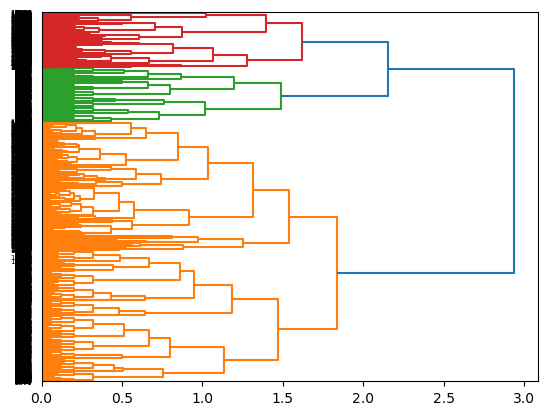

In [114]:
Z = hierarchy.linkage(X.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z, orientation='right')

In [115]:
complete_clusters = fcluster(Z, t=2, criterion='maxclust')

In [116]:
pd.Series(complete_clusters).nunique()

2

In [117]:
X['Complete_Segment'] = complete_clusters

In [118]:
X['Complete_Segment'].value_counts()

Complete_Segment
1    7676
2    3220
Name: count, dtype: int64

### วัดผล Scoring

In [122]:

complete_sil_score = silhouette_score(X, complete_clusters)

print(f"Silhouette Score: {complete_sil_score:.4f}")

Silhouette Score: 0.5811


### เปรียบเทียบข้อมูลแต่ละกลุ่ม

In [120]:
X[X['Complete_Segment'] == 1].mean()

HasCrCard             1.000000
Satisfaction Score    0.497955
Risk Score            0.159805
Loyalty Score         0.365524
Complain              0.495390
Single_Segment        3.000000
Complete_Segment      1.000000
dtype: float64

In [121]:
X[X['Complete_Segment'] == 2].mean()

HasCrCard             0.000000
Satisfaction Score    0.498533
Risk Score            0.157904
Loyalty Score         0.384586
Complain              0.508075
Single_Segment        1.491925
Complete_Segment      2.000000
dtype: float64

### Hierarchy: Average

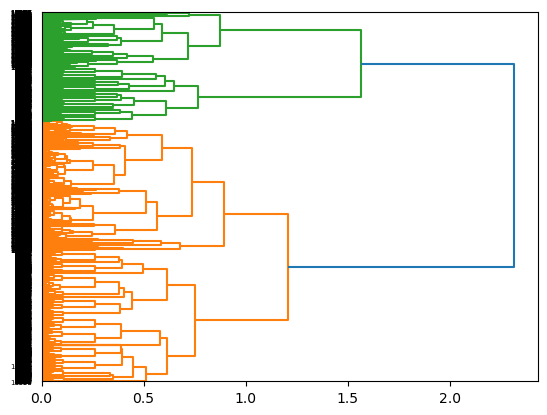

In [123]:
avg_Z = hierarchy.linkage(X.to_numpy(), 'average')
dn = hierarchy.dendrogram(avg_Z, orientation='right')

In [379]:
avg_clusters = fcluster(avg_Z, t=4, criterion='maxclust')

In [380]:
X['Average_Segment'] = avg_clusters

In [135]:
X['Average_Segment'].value_counts()

Average_Segment
1    3874
2    3802
4    1636
3    1584
Name: count, dtype: int64

### วัดผล Scoring

In [382]:

sil_score = silhouette_score(X, avg_clusters)

print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.6271


### เปรียบเทียบข้อมูลแต่ละกลุ่ม

In [136]:
X[selected_feature][X['Average_Segment'] == 1].mean()

HasCrCard             1.000000
Satisfaction Score    0.506183
Risk Score            0.188548
Loyalty Score         0.430573
Complain              0.000199
dtype: float64

In [137]:
X[selected_feature][X['Average_Segment'] == 2].mean()

HasCrCard             1.000000
Satisfaction Score    0.489571
Risk Score            0.130517
Loyalty Score         0.299244
Complain              0.999959
dtype: float64

In [138]:
X[selected_feature][X['Average_Segment'] == 3].mean()

HasCrCard             0.000000
Satisfaction Score    0.497475
Risk Score            0.182491
Loyalty Score         0.422942
Complain              0.000000
dtype: float64

In [139]:
X[selected_feature][X['Average_Segment'] == 4].mean()

HasCrCard             0.000000
Satisfaction Score    0.499557
Risk Score            0.134099
Loyalty Score         0.347449
Complain              1.000000
dtype: float64

#### การวิเคราะห์

กลุ่ม 1 (บัตรเครดิต, พึงพอใจสูง, ไม่มีการร้องเรียน):
กลุ่มนี้มีคะแนนความพึงพอใจสูง และไม่มีการร้องเรียนเลย
ความเสี่ยงสูงและความจงรักภักดีค่อนข้างสูง
เป็นกลุ่มที่ดูเหมือนจะพอใจในบริการ

กลุ่ม 2 (บัตรเครดิต, พึงพอใจต่ำ, ร้องเรียนมาก):
กลุ่มนี้มีการร้องเรียนสูงมาก (เกือบ 100%) และความจงรักภักดีต่ำ
คะแนนความพึงพอใจต่ำและมีความเสี่ยงต่ำ
อาจต้องดูแลลูกค้ากลุ่มนี้ให้ดีเพื่อปรับปรุงความพึงพอใจ

กลุ่ม 3 (ไม่มีบัตรเครดิต, พึงพอใจปานกลาง, ไม่มีการร้องเรียน):
กลุ่มนี้ไม่มีบัตรเครดิต แต่ยังไม่มีการร้องเรียน และความจงรักภักดีค่อนข้างสูง
คะแนนความพึงพอใจค่อนข้างดี แต่อาจต้องพิจารณาความสัมพันธ์กับลูกค้ากลุ่มนี้

กลุ่ม 4 (ไม่มีบัตรเครดิต, พึงพอใจปานกลาง, ร้องเรียน 100%):
กลุ่มนี้ไม่มีบัตรเครดิตและมีการร้องเรียนเต็มที่
ความพึงพอใจอยู่ที่ระดับปานกลาง และมีความเสี่ยงต่ำ
ต้องการการดูแลที่ใส่ใจเพื่อลดการร้องเรียน

Conclusion

กลุ่ม 1: ลูกค้าที่มีบัตรเครดิตและพึงพอใจสูง ไม่มีการร้องเรียน

กลุ่ม 2: ลูกค้าที่มีบัตรเครดิตและพึงพอใจต่ำ พร้อมการร้องเรียนสูง

กลุ่ม 3: ลูกค้าที่ไม่มีบัตรเครดิตและพึงพอใจปานกลาง ไม่มีการร้องเรียน

กลุ่ม 4: ลูกค้าที่ไม่มีบัตรเครดิตและพึงพอใจปานกลาง แต่ร้องเรียนสูง

## Decision Tree

In [140]:
from sklearn.tree import DecisionTreeClassifier

### Training with Gini index

In [141]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER',
       'Risk Score', 'Loyalty Score'],
      dtype='object')

In [142]:
len(X_train.columns)

22

In [143]:
def train_using_gini(X_train, y_train):
    clf_gini = DecisionTreeClassifier(criterion='gini',
                                     random_state=100,
                                     max_depth=3,
                                     min_samples_leaf=5,
                                     max_features='log2') # 11: 73.16
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [144]:
model_1 = train_using_gini(X_train, y_train)
y_pred = model_1.predict(X_test)

In [145]:
pd.Series(model_1.feature_importances_, index=X_train.columns).sort_values(ascending=False)

Complain              0.694925
NumOfProducts         0.280818
Gender_Female         0.024238
Point Earned          0.000018
CreditScore           0.000002
Geography_Spain       0.000000
Risk Score            0.000000
Card Type_SILVER      0.000000
Card Type_PLATINUM    0.000000
Card Type_GOLD        0.000000
Card Type_DIAMOND     0.000000
Gender_Male           0.000000
Geography_France      0.000000
Geography_Germany     0.000000
Age                   0.000000
Satisfaction Score    0.000000
EstimatedSalary       0.000000
IsActiveMember        0.000000
HasCrCard             0.000000
Balance               0.000000
Tenure                0.000000
Loyalty Score         0.000000
dtype: float64

### Gini: Visualize Tree

In [96]:
from sklearn.tree import plot_tree

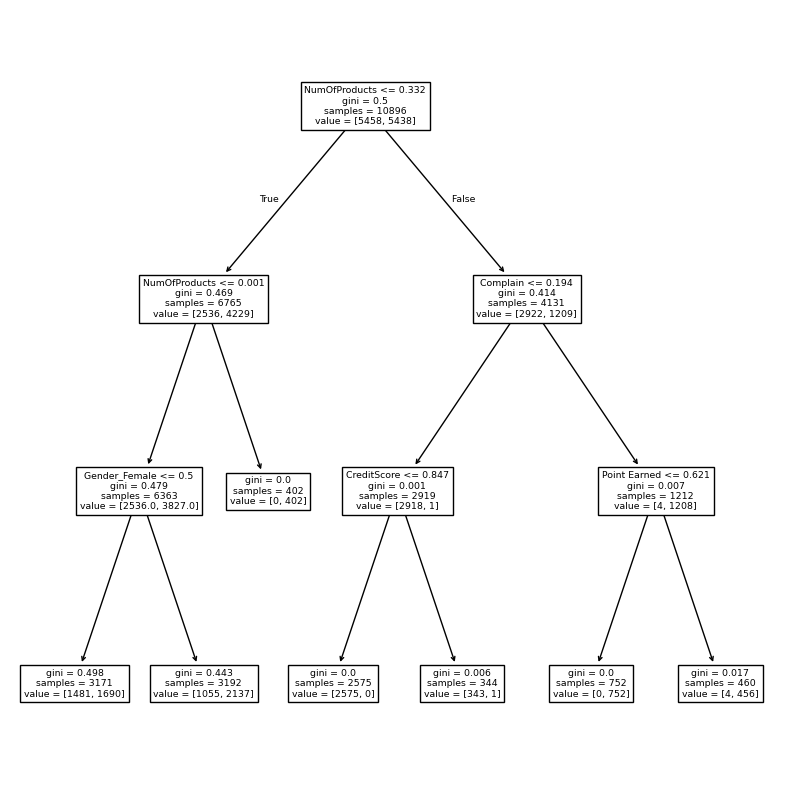

In [97]:
plt.figure(figsize=[10, 10])
plot_tree(model_1, feature_names=X_train.columns)
plt.show()

In [102]:
y_test.value_counts()

Exited
0    2416
1     584
Name: count, dtype: int64

In [98]:
cal_accuracy(y_test=y_test, y_pred=y_pred)

Confusion Matrix: 
 [[1320 1096]
 [   0  584]]
Accuracy :  63.46666666666667
Report :                precision    recall  f1-score   support

           0       1.00      0.55      0.71      2416
           1       0.35      1.00      0.52       584

    accuracy                           0.63      3000
   macro avg       0.67      0.77      0.61      3000
weighted avg       0.87      0.63      0.67      3000



### Training with Entropy

In [48]:
def train_using_entropy(X_train, y_train):
    clf_entropy = DecisionTreeClassifier(criterion='entropy',
                                     random_state=100,
                                     max_depth=3,
                                     min_samples_leaf=5)
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [49]:
model_2 = train_using_entropy(X_train, y_train)
y_pred = model_2.predict(X_test)

In [50]:
cal_accuracy(y_test=y_test, y_pred=y_pred)

Confusion Matrix: 
 [[2413    3]
 [   1  583]]
Accuracy :  99.86666666666667
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [53]:
# DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=6,
#                        min_samples_leaf=3)

### Hyperparameter Tuning

In [155]:
from sklearn.model_selection import GridSearchCV

In [372]:
param_dist = {
    "max_depth": [None, 3, 5, 10, 15],
    "max_features": ['sqrt', 'log2', None, .5, .75 ,5, 10, 15],
    "min_samples_leaf": np.arange(1, 10),
    "criterion": ["gini", "entropy"]
}

In [373]:
HT_model_1 = DecisionTreeClassifier()
HT_model_1_cv = GridSearchCV(HT_model_1, param_dist, cv=5)
HT_model_1_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10, 15],
                         'max_features': ['sqrt', 'log2', None, 0.5, 0.75, 5,
                                          10, 15],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [374]:
y_pred = HT_model_1_cv.predict(X_test)

In [375]:
cal_accuracy(y_pred=y_pred, y_test=y_test)

Confusion Matrix: 
 [[2413    3]
 [   4  580]]
Accuracy :  99.76666666666667
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      0.99      0.99       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



### Test Model

In [368]:
test_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=6, min_samples_leaf=3)

In [369]:
test_model.fit(X_train, y_train)
pred_y = test_model.predict(X_test)
cal_accuracy(y_pred=pred_y, y_test=y_test)

Confusion Matrix: 
 [[2291  125]
 [  60  524]]
Accuracy :  93.83333333333333
Report :                precision    recall  f1-score   support

           0       0.97      0.95      0.96      2416
           1       0.81      0.90      0.85       584

    accuracy                           0.94      3000
   macro avg       0.89      0.92      0.91      3000
weighted avg       0.94      0.94      0.94      3000



In [371]:
(pd.Series(searched_model.feature_importances_, index=X_train.columns) * 100).sort_values(ascending=False)

Complain              80.876163
Age                    4.870022
NumOfProducts          4.196622
Risk Score             4.003821
Balance                2.965222
Geography_Germany      1.205716
IsActiveMember         0.888770
Loyalty Score          0.779917
Tenure                 0.142875
EstimatedSalary        0.043834
CreditScore            0.027040
Point Earned           0.000000
Satisfaction Score     0.000000
Geography_Spain        0.000000
Gender_Female          0.000000
Gender_Male            0.000000
Card Type_DIAMOND      0.000000
Card Type_GOLD         0.000000
Card Type_PLATINUM     0.000000
Card Type_SILVER       0.000000
HasCrCard              0.000000
Geography_France       0.000000
dtype: float64

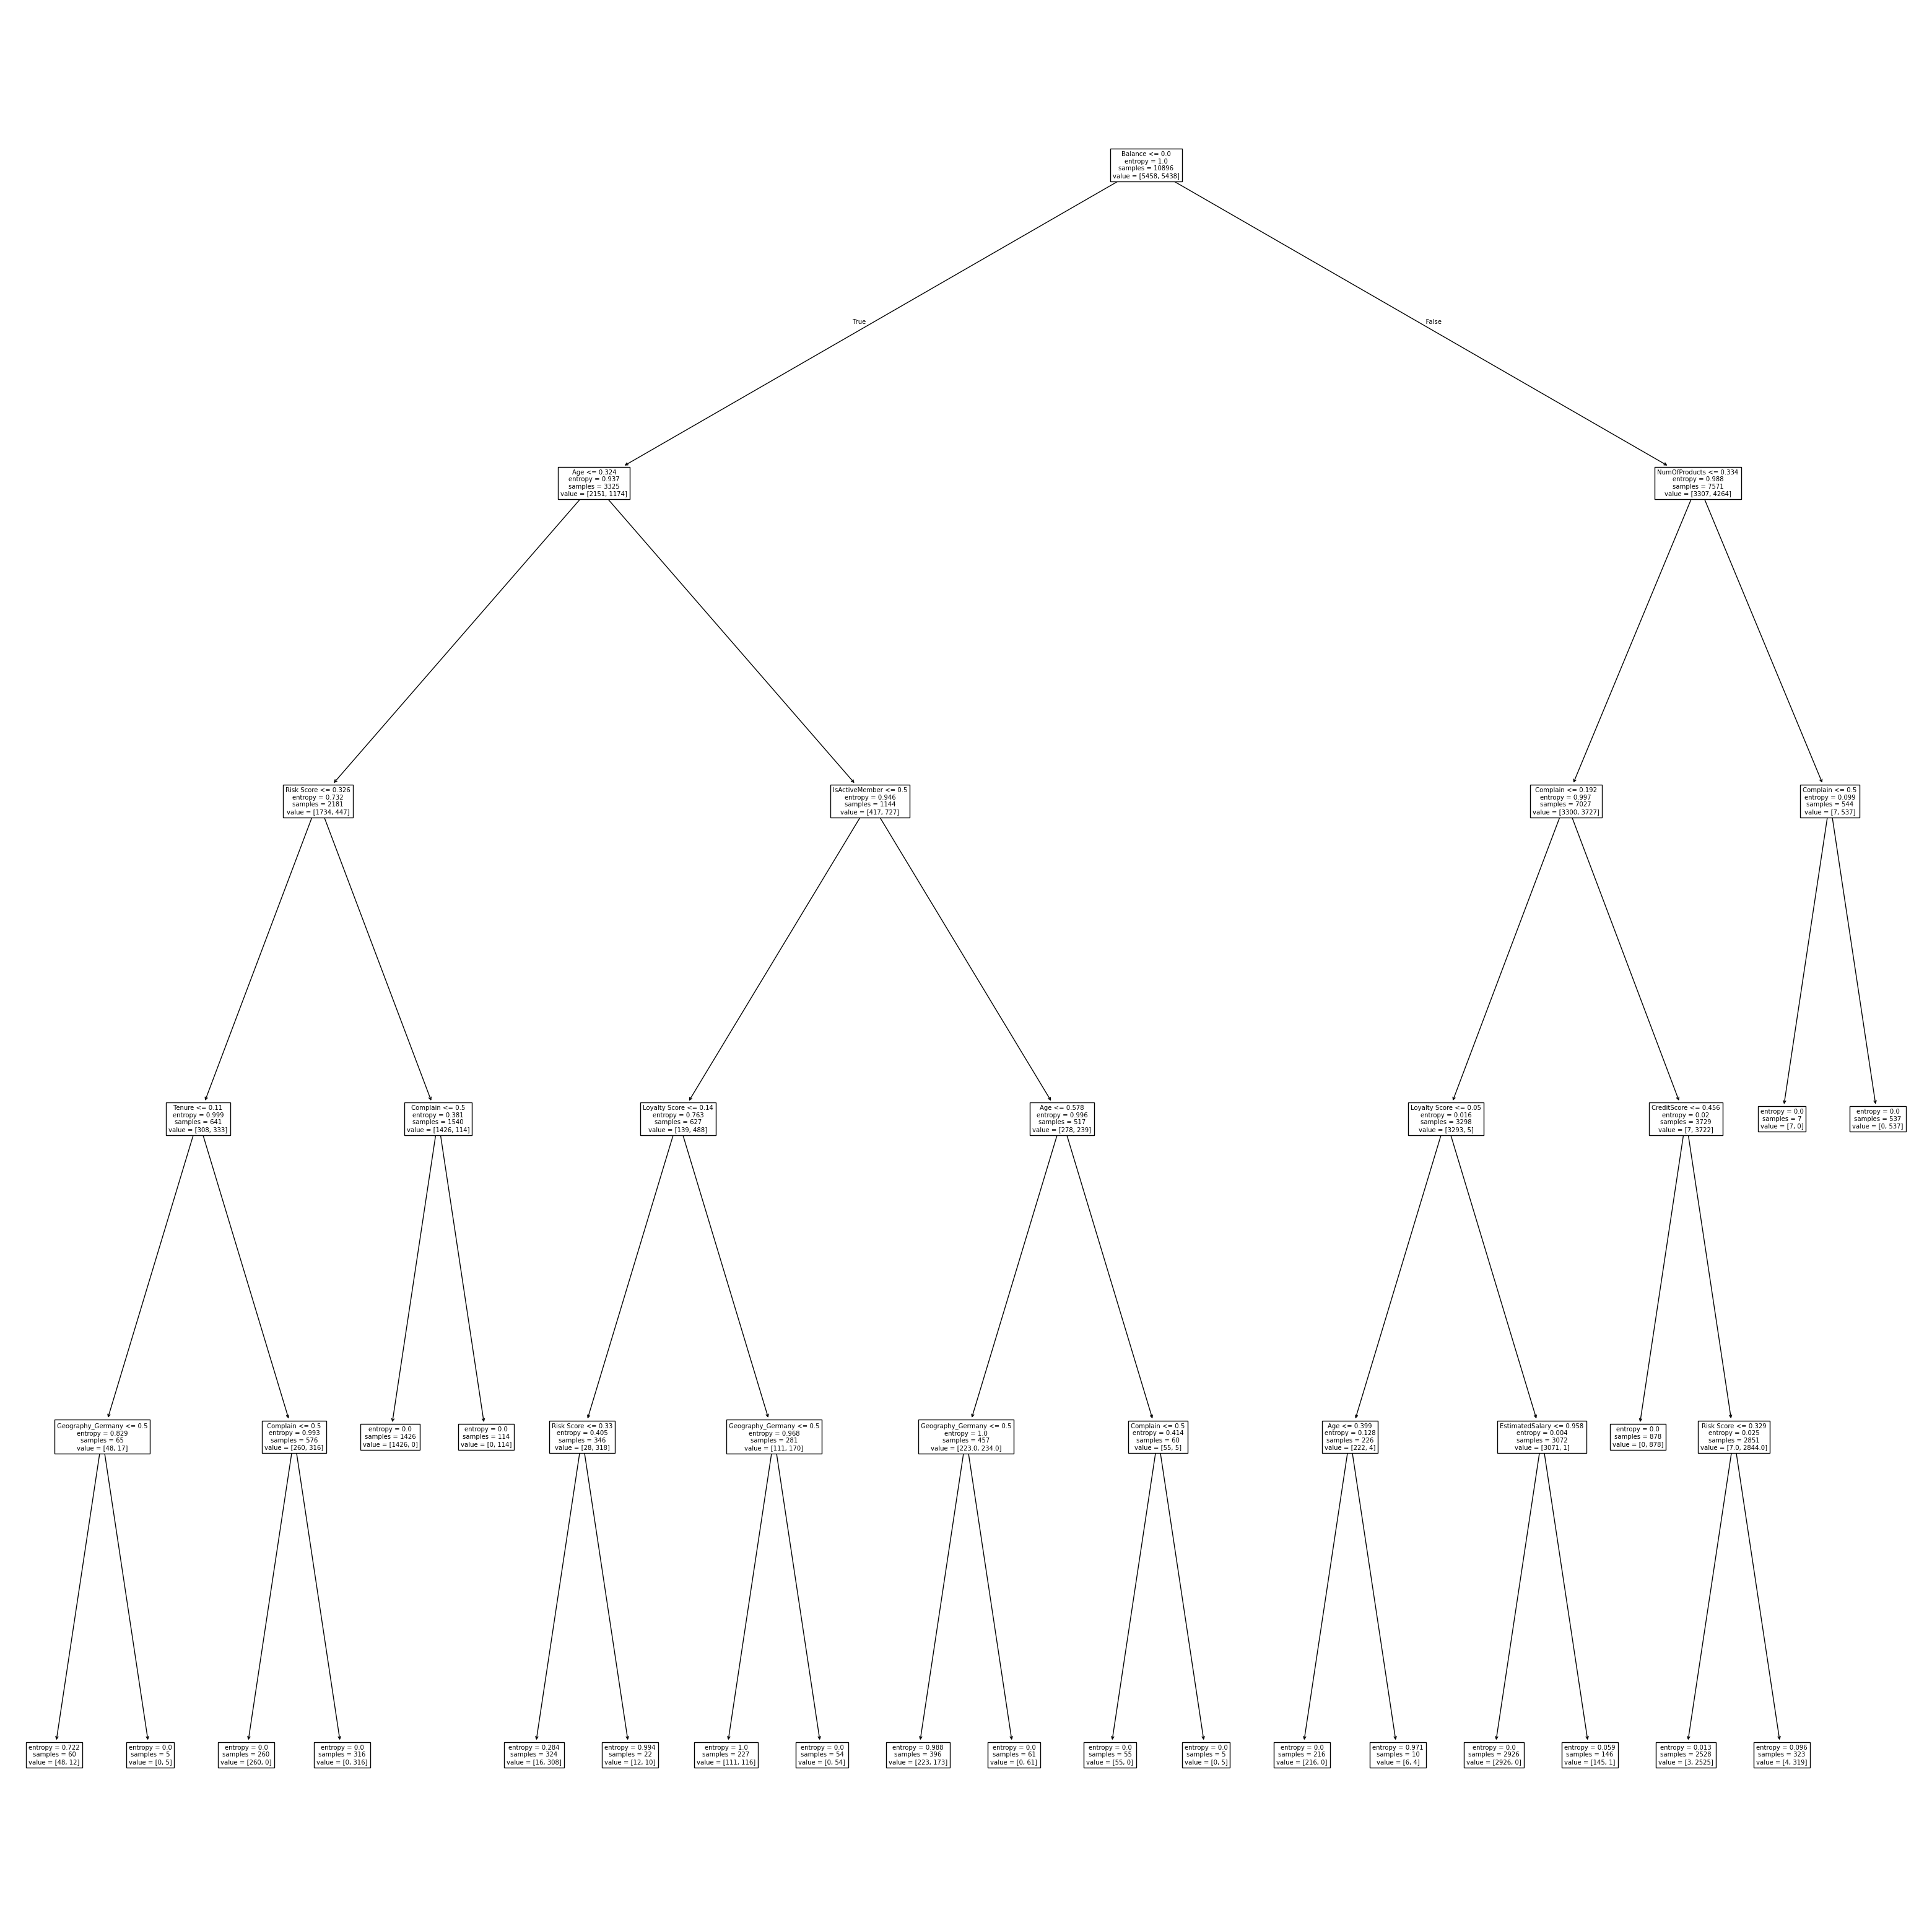

In [364]:
plt.figure(figsize=[40, 40])
plot_tree(searched_model, feature_names=X_train.columns)
plt.show()

### GridCV Model

In [383]:
search_model = DecisionTreeClassifier(max_features=10, min_samples_leaf=5)
search_model.fit(X_train, y_train)
preds = search_model.predict(X_test)

In [384]:
cal_accuracy(y_pred=preds, y_test=y_test)

Confusion Matrix: 
 [[2413    3]
 [   1  583]]
Accuracy :  99.86666666666667
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



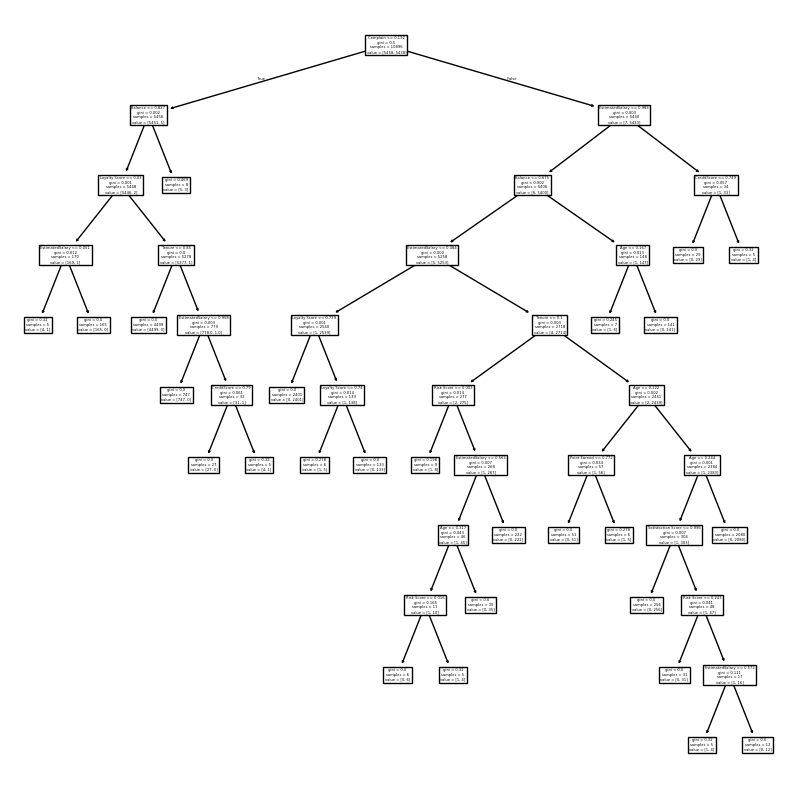

In [378]:
plt.figure(figsize=[10, 10])
plot_tree(search_model, feature_names=X_train.columns)
plt.show()

## RandomForest

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
rf_model = RandomForestClassifier(n_estimators=100, 
                                  random_state=42,
                                  max_features=10)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

cal_accuracy(y_pred=y_pred, y_test=y_test)

Confusion Matrix: 
 [[2413    3]
 [   1  583]]
Accuracy :  99.86666666666667
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [154]:
pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

Complain              0.857298
Age                   0.069929
NumOfProducts         0.033372
Risk Score            0.022885
Loyalty Score         0.004636
Balance               0.004133
Geography_Germany     0.002226
IsActiveMember        0.001942
EstimatedSalary       0.000945
Point Earned          0.000844
CreditScore           0.000492
Tenure                0.000440
Gender_Female         0.000197
Satisfaction Score    0.000192
Geography_Spain       0.000095
Geography_France      0.000069
Card Type_PLATINUM    0.000062
Gender_Male           0.000060
HasCrCard             0.000057
Card Type_DIAMOND     0.000056
Card Type_GOLD        0.000037
Card Type_SILVER      0.000033
dtype: float64

## Clustering

### Let navigate the correlation

In [59]:
X_train.select_dtypes(exclude='object').columns


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER',
       'Risk Score', 'Loyalty Score'],
      dtype='object')

<Axes: >

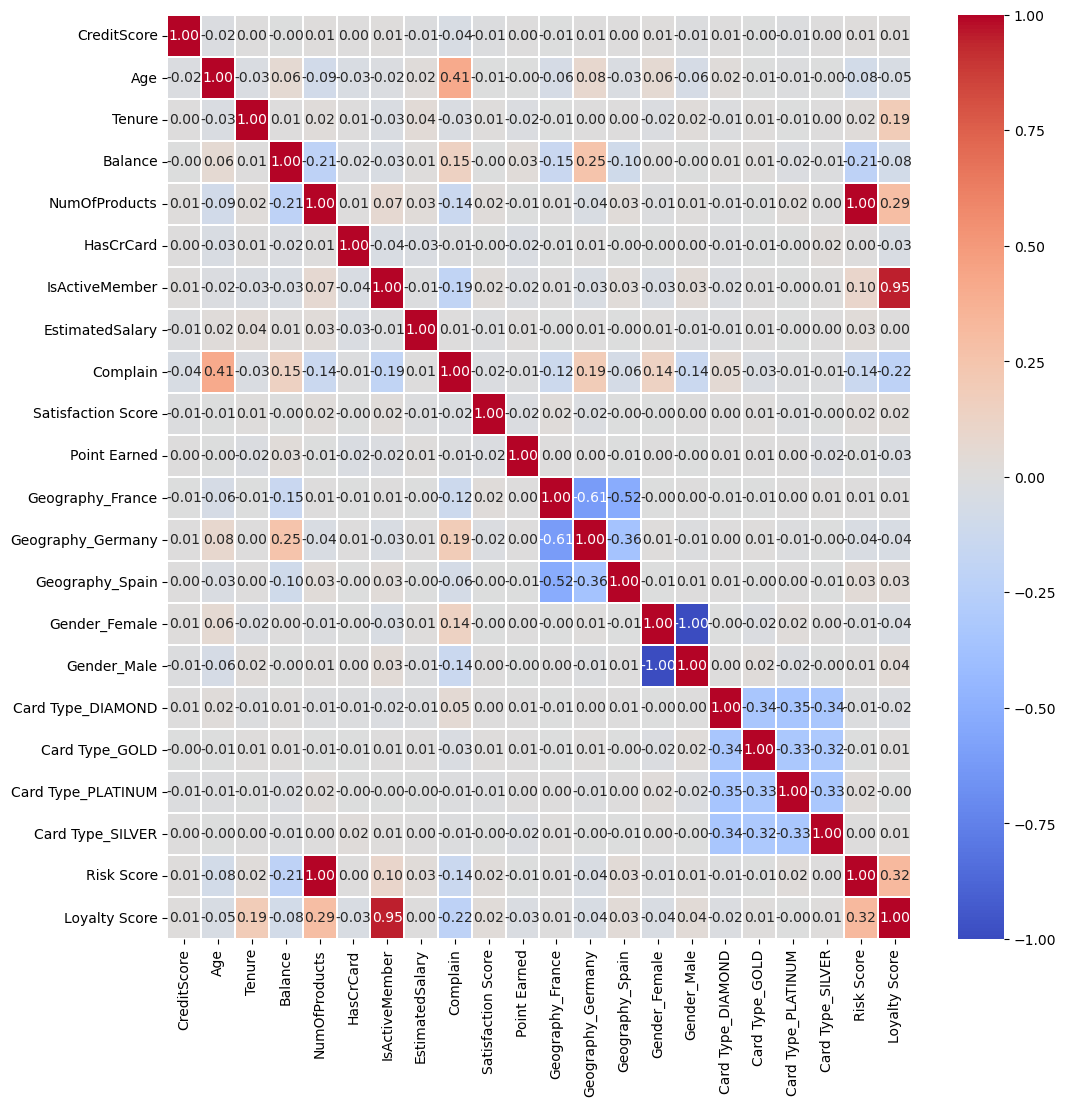

In [60]:
corr = X_train.corr(numeric_only=True)
plt.figure(figsize=[12, 12])
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', lw=.2)

### ลอง plot กราฟ

In [182]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER',
       'Risk Score', 'Loyalty Score'],
      dtype='object')

In [183]:
feature = ['Age', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Risk Score', 'Loyalty Score']

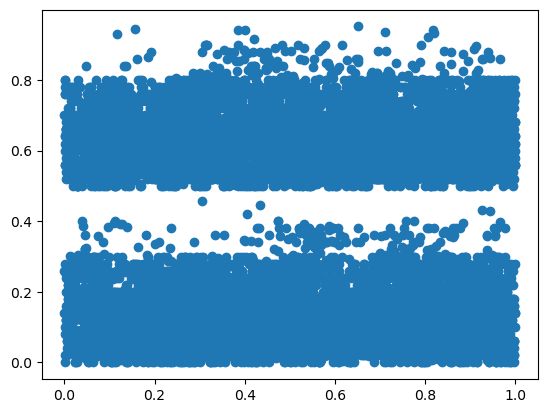

In [184]:
plt.scatter(x=X_train['EstimatedSalary'],
            y=X_train['Loyalty Score'])

### Implement

In [185]:
from sklearn.cluster import DBSCAN


In [186]:
test_df = X_train[feature]

In [351]:
dbscan = DBSCAN(eps=1.5, min_samples=5, algorithm='kd_tree')
clusters = dbscan.fit_predict(test_df)

In [352]:
test_df['Cluster'] = clusters

In [353]:
test_df['Cluster'].value_counts()


Cluster
2    8053
1    1583
0    1260
Name: count, dtype: int64

In [354]:
test_df['Cluster'].nunique()

3

In [355]:
silhouette_score(test_df, dbscan.labels_)

0.30977308500610845